In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk

In [7]:
db=pd.read_csv('fake_news_dataset.csv')
db.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [9]:
db.describe()

,title,text,date,source,author,category,label
count,20000,20000,20000,19000,19000,20000,20000
unique,20000,20000,1096,8,17051,7,2
top,Foreign Democrat final.,more tax development both store agreement lawy...,2023-08-31,Daily News,Michael Smith,Health,fake
freq,1,1,32,2439,12,2922,10056


Checking for oversampling

<Axes: xlabel='label', ylabel='count'>

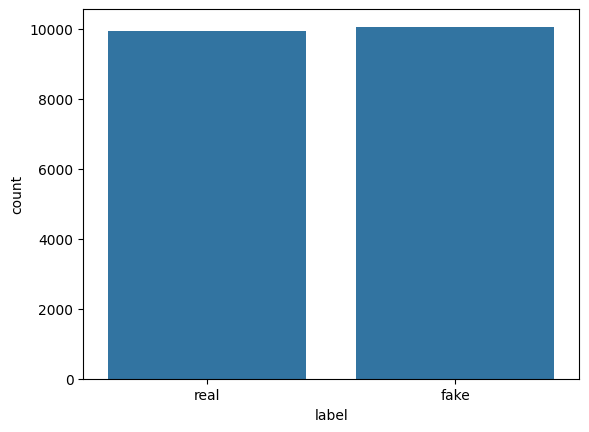

In [10]:
sns.countplot(x='label',data=db)

In [11]:
#Checking for null
db.isnull().sum()

title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
dtype: int64

In [12]:
#Removing source and author from dataset 
db.head(3)


,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake


In [13]:
#Function for counting words
def count_words(text):
    return len(text.split())

In [14]:
db['word_count_title'] = (db['title']).apply(count_words)
db['word_count_text'] = (db['text']).apply(count_words)
db.head()

,title,text,date,source,author,category,label,word_count_title,word_count_text
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real,3,216
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake,6,238
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake,4,222
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake,4,247
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake,5,215


In [15]:
#For max value of text and title
max_value_title = db['word_count_title'].max()
max_value_text = db['word_count_text'].max()
print(max_value_title)
print(max_value_text)

8
300


encoding content of 'label'

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
db['label']=le.fit_transform(db['label'])
db.head(3)

,title,text,date,source,author,category,label,word_count_title,word_count_text
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,1,3,216
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,0,6,238
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,0,4,222


# Preprocessing

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [19]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shres\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shres\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shres\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
stop_word = nltk.corpus.stopwords.words('english')
print('Number of stop words', len(stop_word))

Number of stop words 198


In [21]:
import re

def tokenize(text):
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Strip whitespace
    text = text.strip()

    # Sentence tokenization
    sentences = nltk.sent_tokenize(text)

    # Word tokenization and remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')
    words = [
        word for sentence in sentences
        for word in nltk.word_tokenize(sentence)
        if word.lower() not in stop_words
    ]

    return words


In [22]:
db['title_tokenize']=db['title'].apply(tokenize)
db['text_tokenize']=db['text'].apply(tokenize)

In [23]:
db.head(3)

,title,text,date,source,author,category,label,word_count_title,word_count_text,title_tokenize,text_tokenize
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,1,3,216,"[foreign, democrat, final]","[tax, development, store, agreement, lawyer, h..."
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,0,6,238,"[offer, resource, great, point]","[probably, guess, western, behind, likely, nex..."
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,0,4,222,"[church, carry]","[identify, forward, present, success, risk, se..."


# Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
db["title_tokenize"] = db["title_tokenize"].apply(lambda tokens: " ".join(tokens))
db["text_tokenize"] = db["text_tokenize"].apply(lambda tokens: " ".join(tokens))

In [26]:
vectorizer = TfidfVectorizer()
title_idf = vectorizer.fit_transform(db["title_tokenize"])
text_idf = vectorizer.fit_transform(db["text_tokenize"])

In [27]:
db["title_idf"] = list(title_idf.toarray())
db["text_idf"] = list(text_idf.toarray())
db.head(3)

,title,text,date,source,author,category,label,word_count_title,word_count_text,title_tokenize,text_tokenize,title_idf,text_idf
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,1,3,216,foreign democrat final,tax development store agreement lawyer hear ou...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.06302536683516646,..."
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,0,6,238,offer resource great point,probably guess western behind likely next inve...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.060187578656624226, 0.0, 0.0609271413022023..."
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,0,4,222,church carry,identify forward present success risk several ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06399760896515354, 0.0, 0.0, 0.0, 0.0, 0.0,..."


Creating new dataset containing vectorized parameter only

In [28]:
idf_df = db[["title_idf", "text_idf", "label"]].copy()

In [29]:
idf_df.head(3)

,title_idf,text_idf,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.06302536683516646,...",1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.060187578656624226, 0.0, 0.0609271413022023...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06399760896515354, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [30]:
idf_df["title_idf"] = idf_df["title_idf"].apply(lambda x: np.array(x).flatten())
idf_df["text_idf"] = idf_df["text_idf"].apply(lambda x: np.array(x).flatten())

# Creating model for fake news detection

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x= idf_df[["title_idf", "text_idf"]]
y= idf_df["label"]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
print('Training set shape :',x_train.shape,y_train.shape)
print('Testing set shape :',x_test.shape,y_test.shape)

Training set shape : (16000, 2) (16000,)
Testing set shape : (4000, 2) (4000,)


Using neural network model

In [39]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.preprocessing.sequence import pad_sequences


Padding the length of input sequences for equal length


In [38]:
max_sequence_length=max(x_train['title_idf'].apply(len).max(),x_train['text_idf'].apply(len).max())

# Flatten the lists on the Dataframe columnsabs
x_train_title_padded = pad_sequences(np.array(x_train['title_idf'].tolist()), maxlen=max_sequence_length)
x_train_text_padded = pad_sequences(np.array(x_train['text_idf'].tolist()), maxlen=max_sequence_length)
x_test_title_padded = pad_sequences(np.array(x_test['title_idf'].tolist()), maxlen=max_sequence_length)
x_test_text_padded = pad_sequences(np.array(x_test['text_idf'].tolist()), maxlen=max_sequence_length)

In [40]:
#combine the padded sequences for training and testing 
x_train_combined=np.concatenate((x_train_title_padded,x_train_text_padded),axis=1)
x_test_combined=np.concatenate((x_test_title_padded,x_test_text_padded),axis=1)
x_test_combined.shape,y_test.shape

((4000, 1738), (4000,))

In [52]:
#Define the LSTM model
model=Sequential()

model.add(Dense(128,activation='relu',input_shape=(x_train_combined.shape[1],)))
model.add(Dropout(0.3)) # Add dropout for regularization
model.add(tf.keras.layers.Reshape((1,128))) # Reshape to (batch_size,time_steps)

# NOw add the LSTM layer
model.add(LSTM(64, return_sequences=True)) #We can adjust the number of LSTM units
model.add(Dropout(0.3))
model.add(LSTM(32)) #We can adjust the number of LSTM units
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid')) #Output layer for binary classification

# Compile the model
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

# Train the model 
history=model.fit(x_train_combined,y_train,epochs=10,batch_size=38,validation_split=0.3)

#Evaluate the model
loss,accuracy=model.evaluate(x_test_combined,y_test)
print(f"Test loss : {loss}")
print(f"Test Accuracy : {accuracy}")

Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4900 - loss: 0.6932 - val_accuracy: 0.5058 - val_loss: 0.6931
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5089 - loss: 0.6931 - val_accuracy: 0.4950 - val_loss: 0.6932
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5072 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4989 - loss: 0.6933 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 7/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5070 - loss: 0.6930 - val_accuracy: 0.5050 - val_loss: 0.6932
Epoch 8/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5004 - loss: 0.6930 - val_accuracy: 